# Car Analysis and modelling

## Environment

### Libraries

In [1]:
# Base libraries
import numpy as np
import pandas as pd
import os 

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sklearn models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier

# Sklearn base
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer

### Functions

In [2]:
def dropna(df):
    return df.dropna()

### Data Extraction

In [3]:
cars_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/imports-85.csv')

## EDA (Exploratory Data Analysis)


### General view

In [4]:
# Check it is not filled with NaNs, encoding UTF-8 
cars_df.sample(5)

symboling  normalized-losses        make fuel-type aspiration  \
80           3              153.0  mitsubishi       gas      turbo   
108          0              161.0      peugot    diesel      turbo   
27           1              148.0       dodge       gas      turbo   
39           0               85.0       honda       gas        std   
13           0              188.0         bmw       gas        std   

    num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
80           two  hatchback          fwd           front        96.3  ...   
108         four      sedan          rwd           front       107.9  ...   
27           NaN      sedan          fwd           front        93.7  ...   
39          four      sedan          fwd           front        96.5  ...   
13          four      sedan          rwd           front       101.2  ...   

     engine-size  fuel-system  bore  stroke compression-ratio  horsepower  \
80           110         spdi  3.17    3.46               7.5       116.0   
108          152          idi  3.70    3.52              21.0        95.0   
27            98         mpfi  3.03    3.39               7.6       102.0   
39           110         1bbl  3.15    3.58               9.0        86.0   
13           164         mpfi  3.31    3.19               9.0       121.0   

     peak-rpm city-mpg  highway-mpg    price  
80     5500.0       23           30   9959.0  
108    4150.0       28           33  13200.0  
27     5500.0       24           30   8558.0  
39     5800.0       27           33   8845.0  
13     4250.0       21           28  21105.0  

[5 rows x 26 columns]

In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [6]:
cars_df.describe()

symboling  normalized-losses  wheel-base      length       width  \
count  205.000000         164.000000  205.000000  205.000000  205.000000   
mean     0.834146         122.000000   98.756585  174.049268   65.907805   
std      1.245307          35.442168    6.021776   12.337289    2.145204   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000          94.000000   94.500000  166.300000   64.100000   
50%      1.000000         115.000000   97.000000  173.200000   65.500000   
75%      2.000000         150.000000  102.400000  183.100000   66.900000   
max      3.000000         256.000000  120.900000  208.100000   72.300000   

           height  curb-weight  num-of-cylinders  engine-size        bore  \
count  205.000000   205.000000        205.000000   205.000000  201.000000   
mean    53.724878  2555.565854          4.380488   126.907317    3.329751   
std      2.443522   520.680204          1.080854    41.642693    0.273539   
min     47.800000  1488.000000          2.000000    61.000000    2.540000   
25%     52.000000  2145.000000          4.000000    97.000000    3.150000   
50%     54.100000  2414.000000          4.000000   120.000000    3.310000   
75%     55.500000  2935.000000          4.000000   141.000000    3.590000   
max     59.800000  4066.000000         12.000000   326.000000    3.940000   

           stroke  compression-ratio  horsepower     peak-rpm    city-mpg  \
count  201.000000         205.000000  203.000000   203.000000  205.000000   
mean     3.255423          10.142537  104.256158  5125.369458   25.219512   
std      0.316717           3.972040   39.714369   479.334560    6.542142   
min      2.070000           7.000000   48.000000  4150.000000   13.000000   
25%      3.110000           8.600000   70.000000  4800.000000   19.000000   
50%      3.290000           9.000000   95.000000  5200.000000   24.000000   
75%      3.410000           9.400000  116.000000  5500.000000   30.000000   
max      4.170000          23.000000  288.000000  6600.000000   49.000000   

       highway-mpg         price  
count   205.000000    201.000000  
mean     30.751220  13207.129353  
std       6.886443   7947.066342  
min      16.000000   5118.000000  
25%      25.000000   7775.000000  
50%      30.000000  10295.000000  
75%      34.000000  16500.000000  
max      54.000000  45400.000000

In [7]:
cars_df.select_dtypes(object)

make fuel-type aspiration num-of-doors   body-style drive-wheels  \
0    alfa-romero       gas        std          two  convertible          rwd   
1    alfa-romero       gas        std          two  convertible          rwd   
2    alfa-romero       gas        std          two    hatchback          rwd   
3           audi       gas        std         four        sedan          fwd   
4           audi       gas        std         four        sedan          4wd   
..           ...       ...        ...          ...          ...          ...   
200        volvo       gas        std         four        sedan          rwd   
201        volvo       gas      turbo         four        sedan          rwd   
202        volvo       gas        std         four        sedan          rwd   
203        volvo    diesel      turbo         four        sedan          rwd   
204        volvo       gas      turbo         four        sedan          rwd   

    engine-location engine-type fuel-system  
0             front        dohc        mpfi  
1             front        dohc        mpfi  
2             front        ohcv        mpfi  
3             front         ohc        mpfi  
4             front         ohc        mpfi  
..              ...         ...         ...  
200           front         ohc        mpfi  
201           front         ohc        mpfi  
202           front        ohcv        mpfi  
203           front         ohc         idi  
204           front         ohc        mpfi  

[205 rows x 9 columns]

Some insights:

* Can symboling be negative? Apparently is the only variable with negative values
* Apparently only normalized-losses has more NaNs than the usual
* For the categorical variables it seems that there are no text variables and all of them can be encoded (one-hot)

### Missing values (NaNs)

In [8]:
# Element wise operatios -> Una operación se puede aplicar a CADA elemento de una sola vez
px.bar(cars_df.count() / len(cars_df))

FOR THE SAKE OF THE TIME
asi se queda bien y dropeamos la columna

### Numerical Variables

#### Distributions

In [9]:
numerical_df = cars_df.select_dtypes(exclude=object).copy()
fig = make_subplots(rows=8, cols=2)

num_cols = np.array(numerical_df.drop(columns='price').columns).reshape(8,2)

for row in range(8):
    for col in range(2):
        fig.add_trace(go.Histogram(x=numerical_df[num_cols[row][col]], name=num_cols[row][col]), row=row+1, col=col+1)

fig.update_layout(height=1200, width=900, title_text="Numerical variables")
fig.show()

In [10]:
px.histogram(numerical_df["price"])

#### Outliers

In [11]:
fig = make_subplots(rows=8, cols=2)

num_cols = np.array(numerical_df.drop(columns='price').columns).reshape(8,2)

for row in range(8):
    for col in range(2):
        fig.add_trace(go.Box(x=numerical_df[num_cols[row][col]], name=num_cols[row][col]), row=row+1, col=col+1)

fig.update_layout(height=1200, width=900, title_text="Outliers viz")
fig.show()

In [12]:
px.box(numerical_df["price"])

#### Correlation

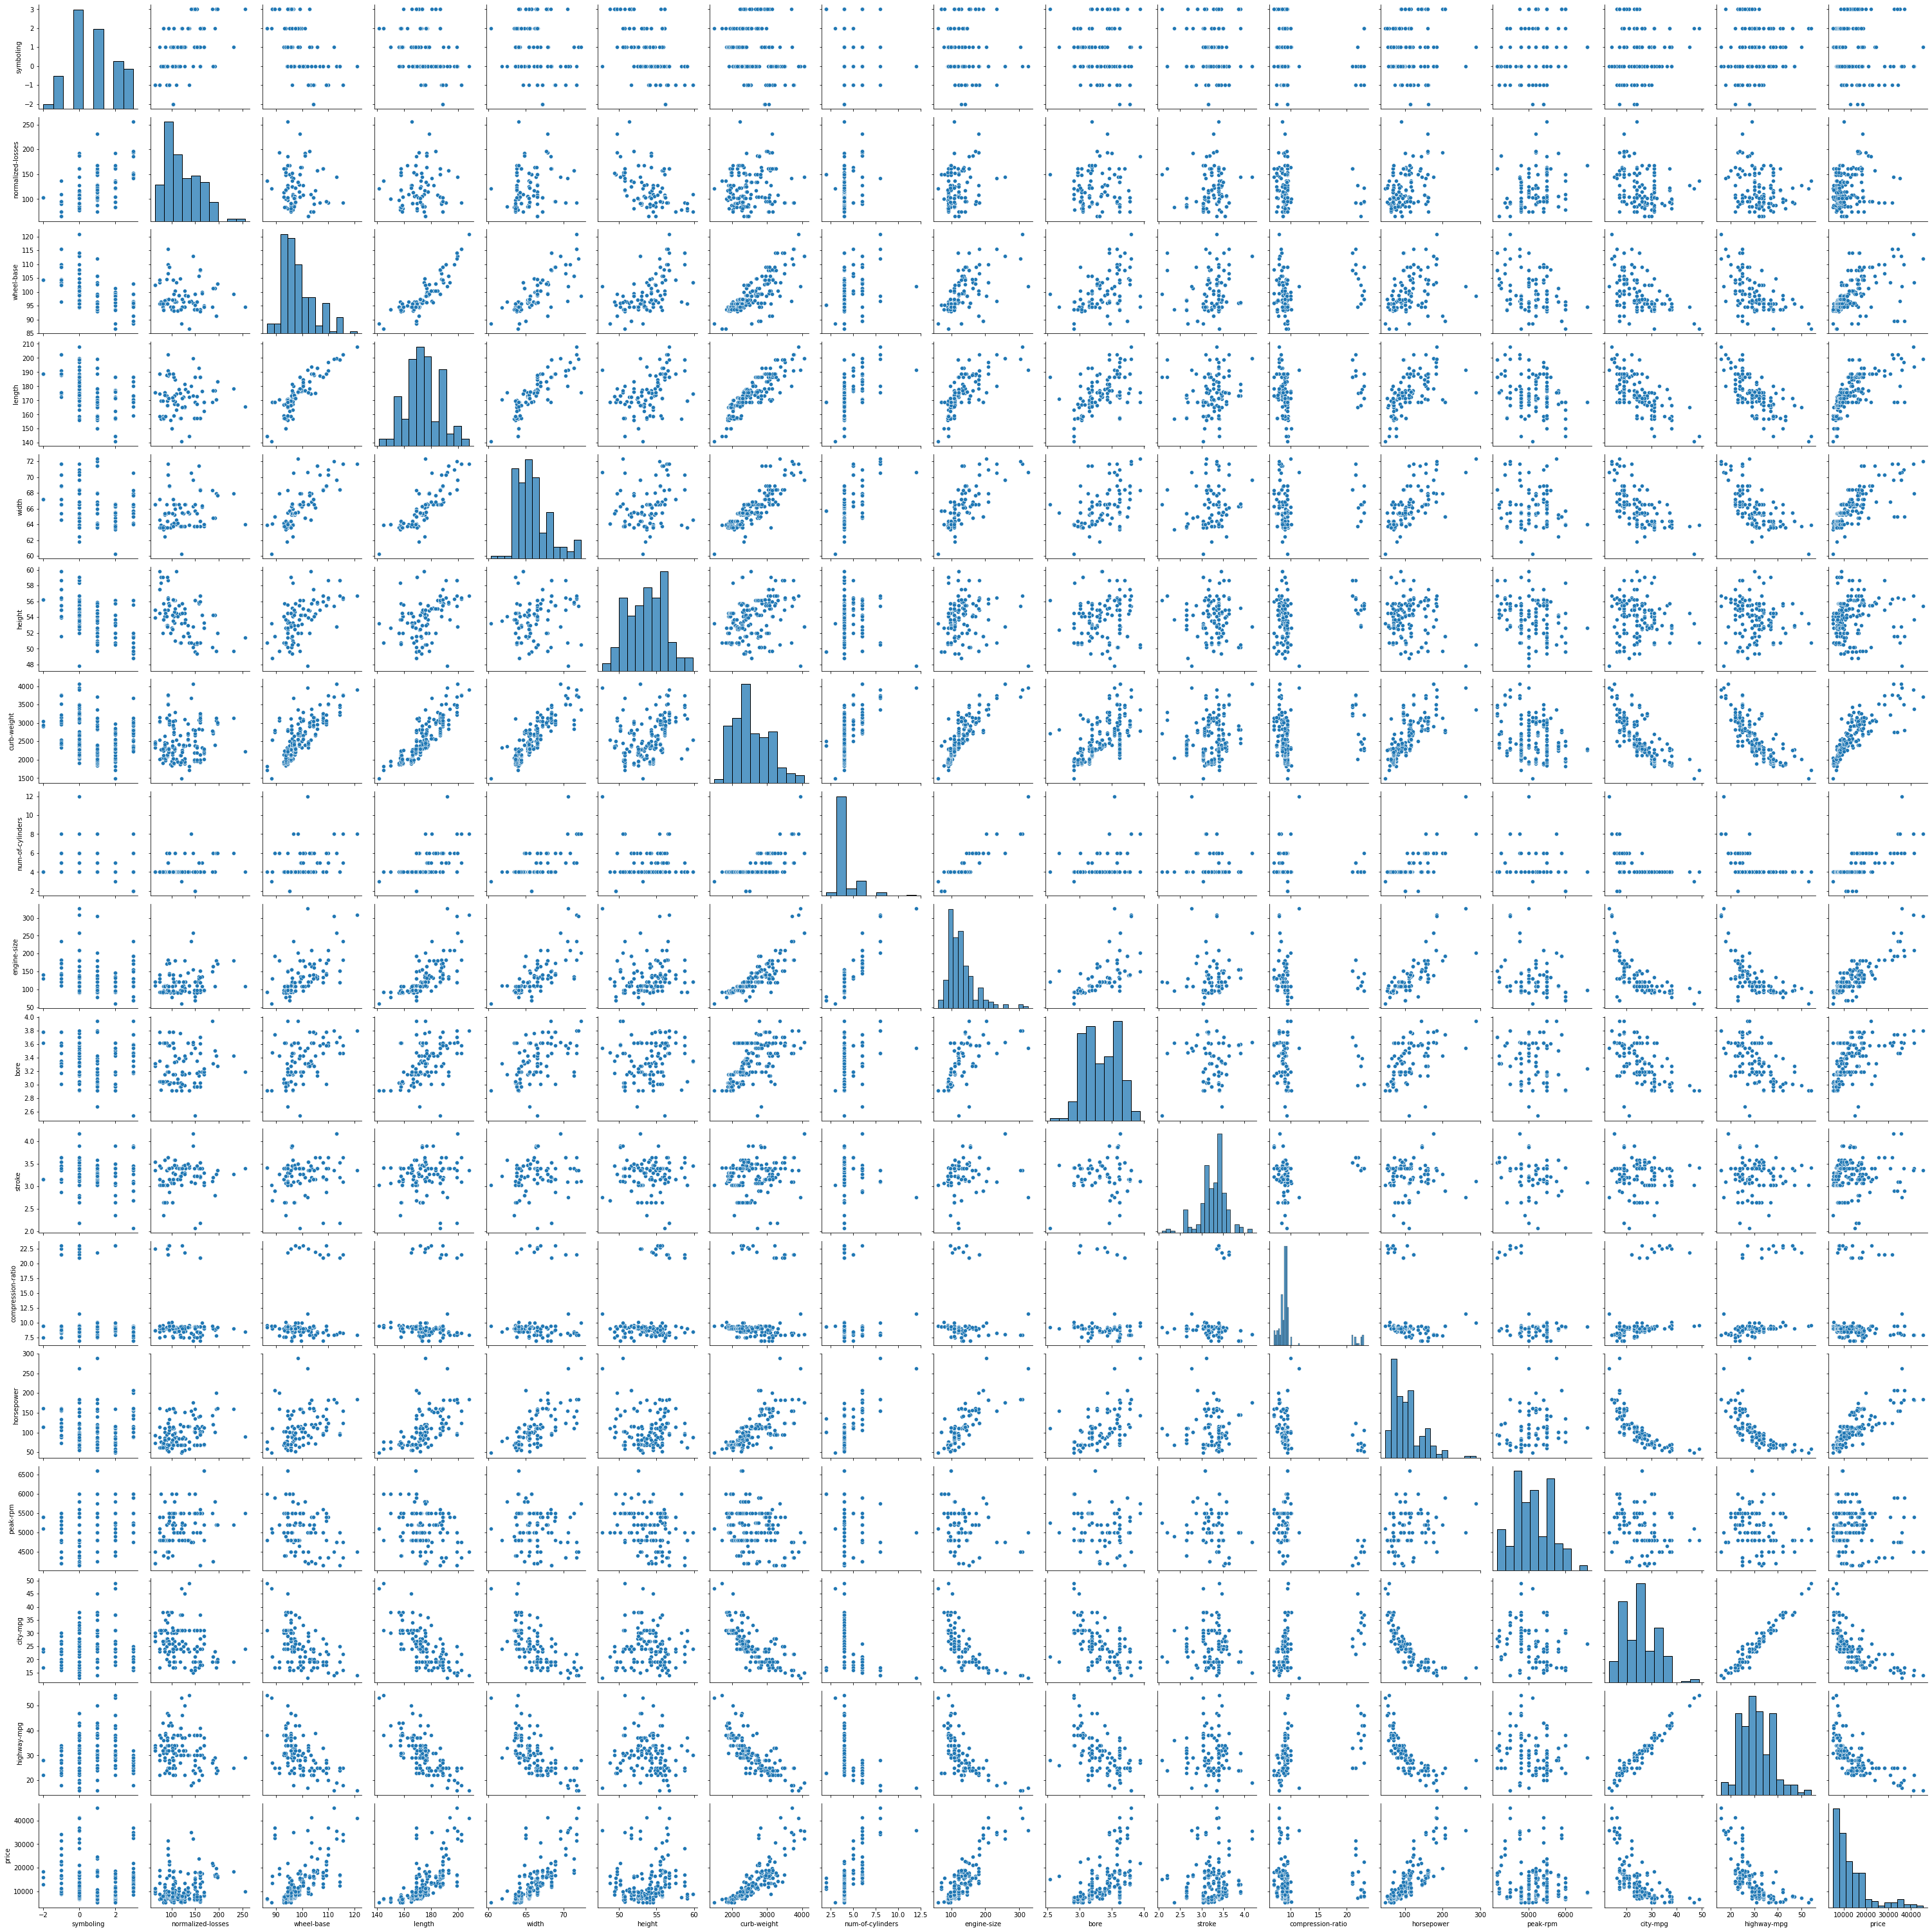

In [13]:
sns.pairplot(numerical_df);

In [14]:
px.imshow(numerical_df.corr())

### Categorical Variables

#### Distribution

In [15]:
categorical_df = cars_df.select_dtypes(object).copy()
fig = make_subplots(rows=3, cols=3)

cat_cols = np.array(categorical_df.columns).reshape(3, 3)

for row in range(3):
    for col in range(3):
        fig.add_trace(go.Histogram(x=categorical_df[cat_cols[row][col]], name=cat_cols[row][col]), row=row+1, col=col+1)

fig.update_layout(height=1200, width=1000, title_text="Categorical variables")
fig.show()

#### Correlation 

In [16]:
fig = make_subplots(rows=3, cols=3)

cat_cols = np.array(categorical_df.columns).reshape(3, 3)

for row in range(3):
    for col in range(3):
        fig.add_trace(
            go.Box(
                x=categorical_df[cat_cols[row][col]],
                y=numerical_df["price"], 
                name=cat_cols[row][col]),
            row=row+1, 
            col=col+1)

fig.update_layout(height=1200, width=1000, title_text="Categorical variables")
fig.show()

In [17]:
bar() # function
px.bar() # method
go.Bar(name="gloria") # class

NameError: name 'bar' is not defined

## Data Wrangling

In [ ]:
X, y = cars_df.drop(columns="price"), cars_df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

### Data cleaning

In [ ]:
def clean_df(df):
    return df.drop(columns="normalized-losses").dropna() # For the sake of the time :D

#Class clean_df
clean_transformer = FunctionTransformer(clean_df)

In [ ]:
clean_transformer.fit_transform(X_train)

In [ ]:
clean_transformer.transform(X_test)